# Graphs with networkx

In [4]:
import networkx as nx

In [5]:
# create graph
G = nx.Graph()

In [6]:
# add nodes

# G.add_node(node_for_adding, **attr)
G.add_node(1)
# G.add_nodes_from(nodes_for_adding, **attr)
G.add_nodes_from([2,3])

In [7]:
# add edges

# G.add_edge(u_of_edge, v_of_edge, **attr)
G.add_edge(1,2)
# G.add_edges_from(ebunch_to_add, **attr)
G.add_edges_from([(1,2),(1,3)])

In [8]:
# graph exploration
print(G.number_of_nodes())
print(G.nodes)
print(G.number_of_edges())
print(G.edges())
print(list(G.neighbors(1)))
print(list(G.adj[1]))
print(G.degree(1))

3
[1, 2, 3]
2
[(1, 2), (1, 3)]
[2, 3]
[2, 3]
2


In [9]:
# Accessing edges and neighbors
print(G[1]) # same as G.adj[1]
print(G[1][2]) # access edge (1,2)
print(G.edges[1,2]) # access edge (1,2)

{2: {}, 3: {}}
{}
{}


In [10]:
# You can get/set the attributes of an edge using subscript notation if the edge already exists.
#
# G.add_edge(1, 2, weight=4.7 )
# G.add_edges_from([(3, 4), (4, 5)], color='red')
# G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])


G[1][3]['color'] = "blue"
G.edges[1,2]['color'] = "red"

In [11]:
# Node attributes
#
# G.add_node(1, time='5pm')
# G.add_nodes_from([3], time='2pm')

## Drawing graphs with matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Riccardo\Anaconda3\envs\myenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


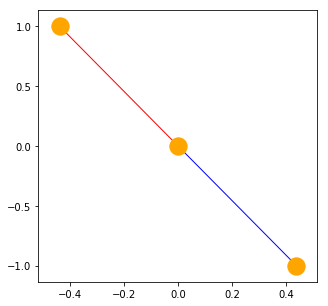

In [13]:
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

nx.draw_networkx_edges(G,pos,edgelist=edges,edge_color=colors)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color='orange')


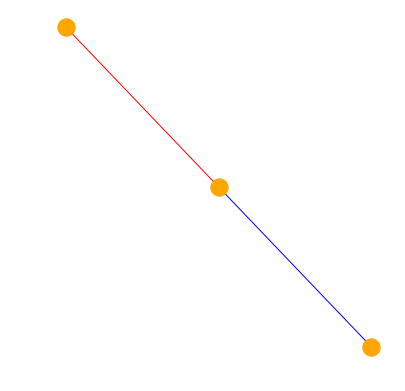

In [14]:
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

nx.draw(G,pos,edges=edges,edge_color=colors,node_color='orange')

### Drawing also node colors

In [15]:
G.add_nodes_from([(1,{'color':'red'}),(2,{'color':'blue'}),(3,{'color':'green'})])
G.nodes(data=True)

NodeDataView({1: {'color': 'red'}, 2: {'color': 'blue'}, 3: {'color': 'green'}})

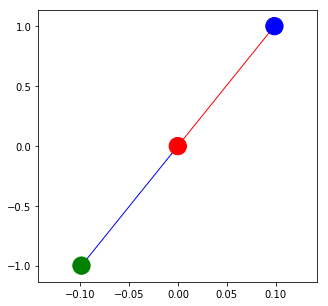

In [16]:
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)

edges = G.edges()
edge_colors = [G[u][v]['color'] for u,v in edges]
nodes = G.nodes()
node_colors = [G.node[i]['color'] for i in nodes]

nx.draw_networkx_edges(G,pos,edgelist=edges,edge_color=edge_colors)
nx.draw_networkx_nodes(G,pos,nodelist=nodes,node_color=node_colors)


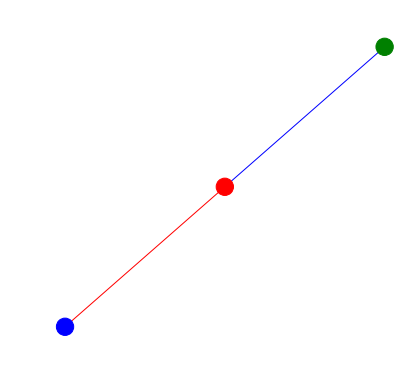

In [17]:
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)

edges = G.edges()
edge_colors = [G[u][v]['color'] for u,v in edges]
nodes = G.nodes()
node_colors = [G.node[i]['color'] for i in nodes]

nx.draw(G,pos,edges=edges,edge_color=edge_colors,node_color=node_colors)

## Drawing also labels

{1: Text(0.0005561724701644475, -0.0009705193474718343, '1'),
 2: Text(0.5727944743879176, -0.999029480652528, '2'),
 3: Text(-0.573350646858082, 1.0, '3')}

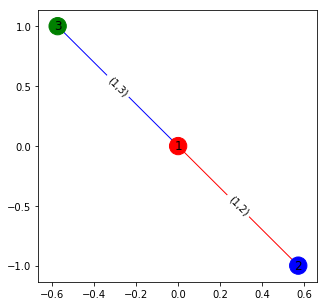

In [18]:
# node labels
node_labels = {i:i for i in G.nodes()}
edge_labels = {(u,v):"(%s,%s)" % (u,v) for u,v in G.edges()}

plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)

edges = G.edges()
edge_colors = [G[u][v]['color'] for u,v in edges]
nodes = G.nodes()
node_colors = [G.node[i]['color'] for i in nodes]

nx.draw_networkx_edges(G,pos,edgelist=edges,edge_color=edge_colors)
nx.draw_networkx_nodes(G,pos,nodelist=nodes,node_color=node_colors)

# edge labels
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
# node labels
nx.draw_networkx_labels(G,pos,labels=node_labels)

### Writing graph on file

In [19]:
nx.write_gml(G,'graph1.gml')

### Reading gml graph

In [20]:
H = nx.read_gml('graph1.gml')

In [21]:
print("H ha", H.number_of_nodes(), "nodi e", H.number_of_edges(), "archi.")

H ha 3 nodi e 2 archi.


## Graph generators and graph operations

1. Applying classic graph operations, such as:
    * subgraph(G, nbunch): induced subgraph view of G on nodes in nbunch
    
    * union(G1,G2): graph union

    * disjoint_union(G1,G2): graph union assuming all nodes are different

    * cartesian_product(G1,G2): return Cartesian product graph

    * compose(G1,G2): combine graphs identifying nodes common to both

    * complement(G): graph complement

    * create_empty_copy(G): return an empty copy of the same graph class

    * to_undirected(G): return an undirected representation of G

    * to_directed(G): return a directed representation of G


2. Using a call to one of the classic small graphs:
    * petersen = nx.petersen_graph()

    * tutte = nx.tutte_graph()

    * maze = nx.sedgewick_maze_graph()

    * tet = nx.tetrahedral_graph()


3. Using a (constructive) generator for a classic graph:
    * K_5 = nx.complete_graph(5)
    
    * K_3_5 = nx.complete_bipartite_graph(3, 5)
    
    * barbell = nx.barbell_graph(10, 10)
    
    * lollipop = nx.lollipop_graph(10, 20)


4. Using a stochastic graph generator
    * er = nx.erdos_renyi_graph(100, 0.15)
    
    * ws = nx.watts_strogatz_graph(30, 3, 0.1)
    
    * ba = nx.barabasi_albert_graph(100, 5)
    
    * red = nx.random_lobster(100, 0.9, 0.9)

## Analyzing graphs

In [26]:
list(nx.connected_components(H))

[{'1', '2', '3'}]

In [38]:
##
# Return a new list containing all items from the iterable in ascending order.
#
# sorted(iterable, /, *, key=None, reverse=False)

sorted((d for n, d in H.degree()))

[1, 1, 2]

In [40]:
nx.clustering(H)

{'1': 0, '2': 0, '3': 0}

In [43]:
# Compute shortest paths between all nodes.
dict(nx.all_pairs_shortest_path(H))

{'1': {'1': ['1'], '2': ['1', '2'], '3': ['1', '3']},
 '2': {'2': ['2'], '1': ['2', '1'], '3': ['2', '1', '3']},
 '3': {'3': ['3'], '1': ['3', '1'], '2': ['3', '1', '2']}}

## Classic graphs

In [47]:
K = nx.complete_graph(6)

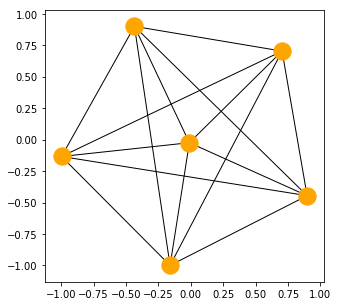

In [49]:
plt.figure(figsize=(5,5))
pos=nx.spring_layout(K)

nx.draw_networkx_edges(K,pos,edgelist=K.edges(),edge_color='black')
nx.draw_networkx_nodes(K,pos,nodelist=K.nodes(),node_color='orange')